In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install config

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

In [108]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
import time
import seaborn as sns

plt.style.use("fivethirtyeight")

In [87]:
consumer_key = "CMFML3Y8vwL1AlhCp9CEZ7tAO"
consumer_secret = "ycrifwV9q6q5qL2ZwaBsozV9ghukguEKY6ZZ0n2ZxVTI49fOPX"
access_token = "1480472774342856705-G25gHO6F5DqJaePuI7gIry5yxgE8l5"
access_token_secret = "IjhGVgOSMKfGCWWxOCoSgmlzXPIMoqJUT9VLxnOBddfee"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


df_query_based_tweets = pd.DataFrame()
text_query = 'diabetics'

try:
    # Creation of query method using appropriate parameters
    tweets = tweepy.Cursor(api.search_tweets,q=text_query).items(count)

    # Pulling information from tweets iterable object and adding relevant tweet information in our data frame
    for tweet in tweets:
        df_query_based_tweets = df_query_based_tweets.append(
                          {'Created at' : tweet._json['created_at'],
                                       'User ID': tweet._json['id'],
                              'User Name': tweet.user._json['name'],
                                        'Text': tweet._json['text'],
                                        'langage':tweet._json['lang'],
                           'Location': tweet.user._json['location'],
           
                         }, ignore_index=True)
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)



In [88]:
df_query_based_tweets.head()

,Created at,User ID,User Name,Text,langage,Location
0,Sun Jan 16 21:11:51 +0000 2022,1.482823e+18,Maire mc Cotter,RT @mukeshkapila: #Insulin and other #diabetes...,en,
1,Sun Jan 16 21:11:44 +0000 2022,1.482823e+18,"Mike Berridge, #FBPA #Peace and Justice, #FBNHS",#CallTheMidwife another brilliant episode ton...,en,Somerset
2,Sun Jan 16 21:11:35 +0000 2022,1.482823e+18,Riden With Biden,@KThomasDC @WSJ Black people trying to vote an...,en,"Indiana, USA"
3,Sun Jan 16 21:11:19 +0000 2022,1.482823e+18,Jaakko,RT @mukeshkapila: #Insulin and other #diabetes...,en,"Espoo, Finland"
4,Sun Jan 16 21:06:19 +0000 2022,1.482822e+18,Abella12 አቤላ:🤔,RT @mukeshkapila: #Insulin and other #diabetes...,en,


In [89]:
df_query_based_tweets

,Created at,User ID,User Name,Text,langage,Location
0,Sun Jan 16 21:11:51 +0000 2022,1.482823e+18,Maire mc Cotter,RT @mukeshkapila: #Insulin and other #diabetes...,en,
1,Sun Jan 16 21:11:44 +0000 2022,1.482823e+18,"Mike Berridge, #FBPA #Peace and Justice, #FBNHS",#CallTheMidwife another brilliant episode ton...,en,Somerset
2,Sun Jan 16 21:11:35 +0000 2022,1.482823e+18,Riden With Biden,@KThomasDC @WSJ Black people trying to vote an...,en,"Indiana, USA"
3,Sun Jan 16 21:11:19 +0000 2022,1.482823e+18,Jaakko,RT @mukeshkapila: #Insulin and other #diabetes...,en,"Espoo, Finland"
4,Sun Jan 16 21:06:19 +0000 2022,1.482822e+18,Abella12 አቤላ:🤔,RT @mukeshkapila: #Insulin and other #diabetes...,en,
...,...,...,...,...,...,...
145,Sun Jan 16 18:08:18 +0000 2022,1.482777e+18,Rahel Tigrai,RT @Etomiuc: #tigray #TigrayFamine \n Thousand...,en,
146,Sun Jan 16 18:06:17 +0000 2022,1.482776e+18,DogginIt,RT @rogerledbette11: #RepKimSchrier was diagno...,en,
147,Sun Jan 16 18:06:12 +0000 2022,1.482776e+18,Tushar Tank,"RT @regeneration_in: In Mexico, a farmer came ...",en,
148,Sun Jan 16 18:04:42 +0000 2022,1.482776e+18,بوابة إفريقيا,RT @IECStandards: A new IEC Standard will dete...,en,l'Afrique


In [90]:
# nettoyage du data
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #supprimer les @mentions
    text = re.sub(r'#', '', text) #supprimer les hachtag
    text = re.sub(r'RT[\s]+', '', text) #supprimer RT
    text = re.sub(r'https?:\/\/\S+', '', text) #supprimer les links
    return text


In [91]:
df_query_based_tweets["Text"] = df_query_based_tweets["Text"].apply(cleanTxt)

In [92]:
df_query_based_tweets

,Created at,User ID,User Name,Text,langage,Location
0,Sun Jan 16 21:11:51 +0000 2022,1.482823e+18,Maire mc Cotter,: Insulin and other diabetes meds for Tigray h...,en,
1,Sun Jan 16 21:11:44 +0000 2022,1.482823e+18,"Mike Berridge, #FBPA #Peace and Justice, #FBNHS",CallTheMidwife another brilliant episode toni...,en,Somerset
2,Sun Jan 16 21:11:35 +0000 2022,1.482823e+18,Riden With Biden,Black people trying to vote and diabetics ra...,en,"Indiana, USA"
3,Sun Jan 16 21:11:19 +0000 2022,1.482823e+18,Jaakko,: Insulin and other diabetes meds for Tigray h...,en,"Espoo, Finland"
4,Sun Jan 16 21:06:19 +0000 2022,1.482822e+18,Abella12 አቤላ:🤔,: Insulin and other diabetes meds for Tigray h...,en,
...,...,...,...,...,...,...
145,Sun Jan 16 18:08:18 +0000 2022,1.482777e+18,Rahel Tigrai,: tigray TigrayFamine \n Thousands of diabetic...,en,
146,Sun Jan 16 18:06:17 +0000 2022,1.482776e+18,DogginIt,: RepKimSchrier was diagnosed with diabetes wh...,en,
147,Sun Jan 16 18:06:12 +0000 2022,1.482776e+18,Tushar Tank,"_in: In Mexico, a farmer came up with an innov...",en,
148,Sun Jan 16 18:04:42 +0000 2022,1.482776e+18,بوابة إفريقيا,: A new IEC Standard will determine the perfor...,en,l'Afrique


In [127]:
df_query_based_tweets.to_csv("tweetsf.csv", index=False)

In [93]:
df_query_based_tweets['Text'][1]

'CallTheMidwife  another brilliant episode tonight. The meths drinker problem well dealt with, the neglect that som… '

In [94]:
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
df_query_based_tweets['TextBlob_Subjectivity'] = df_query_based_tweets['Text'].apply(getSubjectivity)
df_query_based_tweets['TextBlob_Polarity'] = df_query_based_tweets['Text'].apply(getPolarity)

In [95]:
df_query_based_tweets

,Created at,User ID,User Name,Text,langage,Location,TextBlob_Subjectivity,TextBlob_Polarity
0,Sun Jan 16 21:11:51 +0000 2022,1.482823e+18,Maire mc Cotter,: Insulin and other diabetes meds for Tigray h...,en,,0.220833,-0.062500
1,Sun Jan 16 21:11:44 +0000 2022,1.482823e+18,"Mike Berridge, #FBPA #Peace and Justice, #FBNHS",CallTheMidwife another brilliant episode toni...,en,Somerset,1.000000,0.900000
2,Sun Jan 16 21:11:35 +0000 2022,1.482823e+18,Riden With Biden,Black people trying to vote and diabetics ra...,en,"Indiana, USA",0.433333,-0.166667
3,Sun Jan 16 21:11:19 +0000 2022,1.482823e+18,Jaakko,: Insulin and other diabetes meds for Tigray h...,en,"Espoo, Finland",0.220833,-0.062500
4,Sun Jan 16 21:06:19 +0000 2022,1.482822e+18,Abella12 አቤላ:🤔,: Insulin and other diabetes meds for Tigray h...,en,,0.220833,-0.062500
...,...,...,...,...,...,...,...,...
145,Sun Jan 16 18:08:18 +0000 2022,1.482777e+18,Rahel Tigrai,: tigray TigrayFamine \n Thousands of diabetic...,en,,0.000000,0.000000
146,Sun Jan 16 18:06:17 +0000 2022,1.482776e+18,DogginIt,: RepKimSchrier was diagnosed with diabetes wh...,en,,0.000000,0.000000
147,Sun Jan 16 18:06:12 +0000 2022,1.482776e+18,Tushar Tank,"_in: In Mexico, a farmer came up with an innov...",en,,1.000000,0.250000
148,Sun Jan 16 18:04:42 +0000 2022,1.482776e+18,بوابة إفريقيا,: A new IEC Standard will determine the perfor...,en,l'Afrique,0.227273,0.068182


In [121]:
df_query_based_tweets['langage'].value_counts()

en     147
und      2
pt       1
Name: langage, dtype: int64

In [122]:
df_query_based_tweets['langage'].value_counts(normalize=True)*100

en     98.000000
und     1.333333
pt      0.666667
Name: langage, dtype: float64

<AxesSubplot:title={'center':'langage'}>

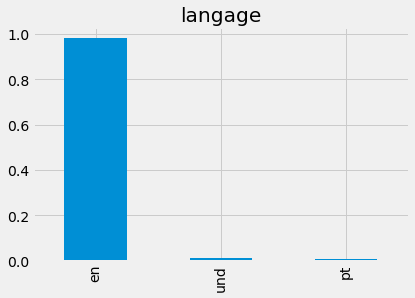

In [124]:
df_query_based_tweets['langage'].value_counts(normalize=True).plot.bar(title='langage')

In [125]:
df_query_based_tweets['Location'].value_counts(normalize=True)*100

                       54.000000
United States           2.000000
USA                     1.333333
New York, USA           1.333333
Seattle, WA             1.333333
                         ...    
Denver, CO              0.666667
Nashville, TN           0.666667
Hessen, Deutschland     0.666667
LDN, UK                 0.666667
Northern California     0.666667
Name: Location, Length: 65, dtype: float64

C:\Users\Moataz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


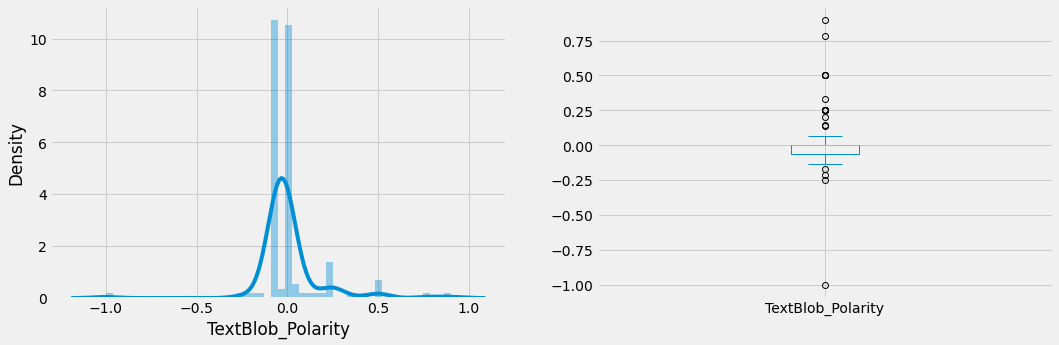

In [126]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_query_based_tweets['TextBlob_Polarity'])

plt.subplot(122)
df_query_based_tweets['TextBlob_Polarity'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

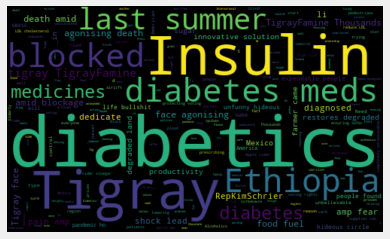

In [96]:
allWords = ' '.join( [twts for twts in df_query_based_tweets['Text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [97]:
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [98]:
 df_query_based_tweets['TextBlob_Analysis'] = df_query_based_tweets['TextBlob_Polarity'].apply(getAnalysis )

In [99]:
df_query_based_tweets

,Created at,User ID,User Name,Text,langage,Location,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Sun Jan 16 21:11:51 +0000 2022,1.482823e+18,Maire mc Cotter,: Insulin and other diabetes meds for Tigray h...,en,,0.220833,-0.062500,Negative
1,Sun Jan 16 21:11:44 +0000 2022,1.482823e+18,"Mike Berridge, #FBPA #Peace and Justice, #FBNHS",CallTheMidwife another brilliant episode toni...,en,Somerset,1.000000,0.900000,Positive
2,Sun Jan 16 21:11:35 +0000 2022,1.482823e+18,Riden With Biden,Black people trying to vote and diabetics ra...,en,"Indiana, USA",0.433333,-0.166667,Negative
3,Sun Jan 16 21:11:19 +0000 2022,1.482823e+18,Jaakko,: Insulin and other diabetes meds for Tigray h...,en,"Espoo, Finland",0.220833,-0.062500,Negative
4,Sun Jan 16 21:06:19 +0000 2022,1.482822e+18,Abella12 አቤላ:🤔,: Insulin and other diabetes meds for Tigray h...,en,,0.220833,-0.062500,Negative
...,...,...,...,...,...,...,...,...,...
145,Sun Jan 16 18:08:18 +0000 2022,1.482777e+18,Rahel Tigrai,: tigray TigrayFamine \n Thousands of diabetic...,en,,0.000000,0.000000,Neutral
146,Sun Jan 16 18:06:17 +0000 2022,1.482776e+18,DogginIt,: RepKimSchrier was diagnosed with diabetes wh...,en,,0.000000,0.000000,Neutral
147,Sun Jan 16 18:06:12 +0000 2022,1.482776e+18,Tushar Tank,"_in: In Mexico, a farmer came up with an innov...",en,,1.000000,0.250000,Positive
148,Sun Jan 16 18:04:42 +0000 2022,1.482776e+18,بوابة إفريقيا,: A new IEC Standard will determine the perfor...,en,l'Afrique,0.227273,0.068182,Positive


In [100]:
j = 1 
sortedDF = df_query_based_tweets.sort_values(by=['TextBlob_Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['TextBlob_Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Text'][i])
        print()
        j=j+1

1) CallTheMidwife  another brilliant episode tonight. The meths drinker problem well dealt with, the neglect that som… 

2) _in: In Mexico, a farmer came up with an innovative solution that not only restores degraded land to productivity, but also…

3) _in: In Mexico, a farmer came up with an innovative solution that not only restores degraded land to productivity, but also…

4) : _tadesse  this is not politics!!
This report is by International Diabetics Federation, reqiesting urgent action. Please…

5) :  And 16g of carbs meaning it's "great" for diabetics....how much sodium? Probably enough to fill a cup.…

6)   No, we fear for people we know and love who are immuno-comprimised. Elderly, diabetics, asthmatics,… 

7) : Thanks, but we’re type one diabetics, we worship _and_tonic 

8) _in: In Mexico, a farmer came up with an innovative solution that not only restores degraded land to productivity, but also…

9) _in: In Mexico, a farmer came up with an innovative solution that not only r

In [101]:
j = 1 
sortedDF = df_query_based_tweets.sort_values(by=['TextBlob_Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['TextBlob_Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Text'][i])
        print()
        j=j+1

1) : Insulin and other diabetes meds for Tigray have been blocked by Ethiopia since last summer. Some 25000 diabetics in …

2)   Black people trying to vote and diabetics rationing insulin will suffer. Stop focusing on the Presi… 

3) : Insulin and other diabetes meds for Tigray have been blocked by Ethiopia since last summer. Some 25000 diabetics in …

4) : Insulin and other diabetes meds for Tigray have been blocked by Ethiopia since last summer. Some 25000 diabetics in …

5) : Insulin and other diabetes meds for Tigray have been blocked by Ethiopia since last summer. Some 25000 diabetics in …

6) : Insulin and other diabetes meds for Tigray have been blocked by Ethiopia since last summer. Some 25000 diabetics in …

7) : Insulin and other diabetes meds for Tigray have been blocked by Ethiopia since last summer. Some 25000 diabetics in …

8) : Insulin and other diabetes meds for Tigray have been blocked by Ethiopia since last summer. Some 25000 diabetics in …

9) : Insulin and other d

<function matplotlib.pyplot.show(close=None, block=None)>

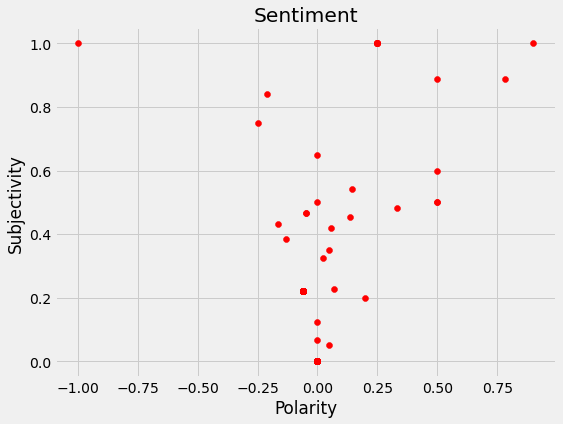

In [102]:
plt.figure(figsize=(8,6))
for i in range(0, df_query_based_tweets.shape[0]):
    plt.scatter(df_query_based_tweets['TextBlob_Polarity'][i], df_query_based_tweets['TextBlob_Subjectivity'][i], color='red')

plt.title('Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [103]:
ptweets = df_query_based_tweets[df_query_based_tweets.TextBlob_Analysis == 'Positive']
ptweets = ptweets['Text']

round((ptweets.shape[0] / df_query_based_tweets.shape[0])*100, 1)

15.3

In [104]:
ptweets = df_query_based_tweets[df_query_based_tweets.TextBlob_Analysis == 'Negative']
ptweets = ptweets['Text']

round((ptweets.shape[0] / df_query_based_tweets.shape[0])*100, 1)

45.3

In [105]:
ptweets = df_query_based_tweets[df_query_based_tweets.TextBlob_Analysis == 'Neutral']
ptweets = ptweets['Text']

round((ptweets.shape[0] / df_query_based_tweets.shape[0])*100, 1)

39.3

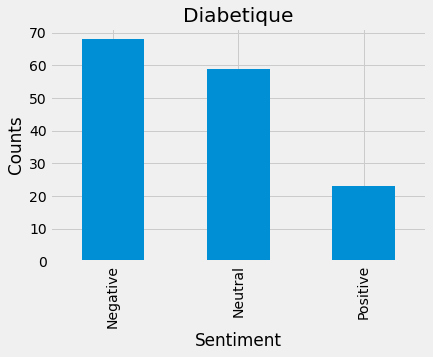

In [106]:
df_query_based_tweets['TextBlob_Analysis'].value_counts()

plt.title('Diabetique')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_query_based_tweets['TextBlob_Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
!pip install nb_black

In [ ]:
!pip install --upgrade IPython

In [ ]:
%load_ext nb_black
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as types

spark = SparkSession.builder.getOrCreate()
spark

In [ ]:
pip install pyspark

In [ ]:
df = spark.read.csv(
    r"C:\Users\Moataz\Documents\tweets.csv", header=True, inferSchema=True
)

In [ ]:
df.columns

In [ ]:
df.show(2)

In [ ]:
df = df.withColumnRenamed("created_at", "step")

In [ ]:
%%time
steps = df.select("user_id").distinct().collect()
for user_id in steps[:]:
  dfa = df.where(f"user_id = {user_id[0]}")
  dfa.coalesce(1).write.mode("append").option("header", "true").csv(r"C:\Users\Moataz")